In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [2]:
# Load the data
data = pd.read_csv("cell2celltrain.csv")

In [3]:
# Drop rows with missing target variable 'Churn' assuming 'Churn' is your target
data = data.dropna(subset=['Churn'])

In [4]:
# Impute missing values in features
# Numeric features imputation
num_imputer = SimpleImputer(strategy='median')
data[data.select_dtypes(include=['int', 'float']).columns] = num_imputer.fit_transform(data.select_dtypes(include=['int', 'float']))

In [5]:
# Categorical features imputation
cat_imputer = SimpleImputer(strategy='most_frequent')
data[data.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(data.select_dtypes(include=['object']))

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Function to plot churn percentage for categorical features
def plot_churn_percentage(data, column):
    churn_counts = data.groupby([column, 'Churn']).size().unstack(fill_value=0)
    churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
    ax = churn_percentage.plot(kind='bar', stacked=True, color=['#4D4D4D', '#FFD700'], figsize=(10, 6))
    plt.title(f'Percentage of Churn by {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate percentage values on each bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                f'{height:.1f}%', 
                horizontalalignment='center', 
                verticalalignment='center')


In [11]:
# List of categorical columns to plot
categorical_columns = ['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

C:\Users\user\AppData\Local\Temp\ipykernel_8604\3528958617.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
C:\Users\user\AppData\Local\Temp\ipykernel_8604\3528958617.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
C:\Users\user\AppData\Local\Temp\ipykernel_8604\3528958617.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i)
C:\Users\user\AppData\Local\Temp\ipykernel_8604\3528958617.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.rem

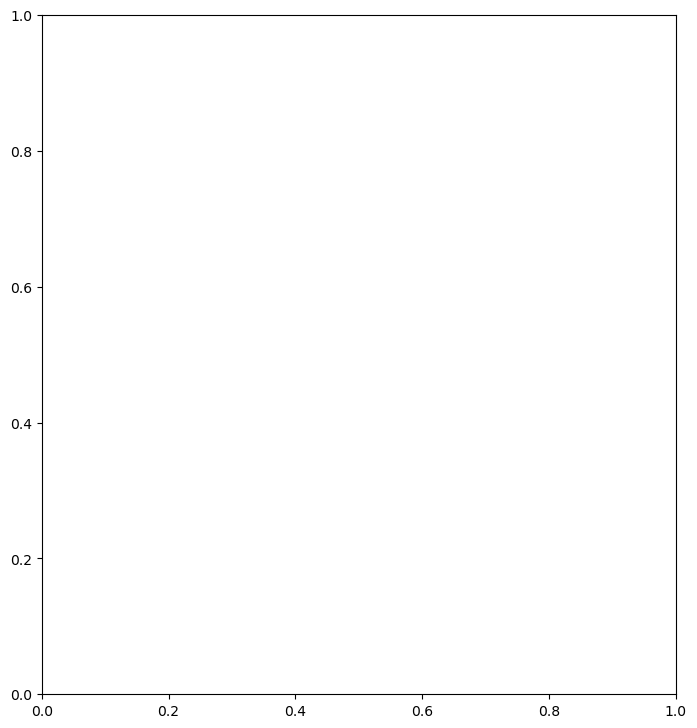

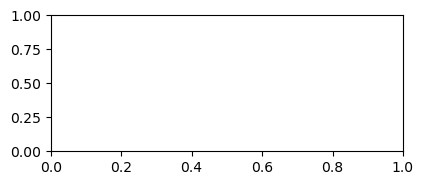

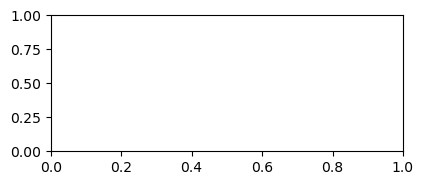

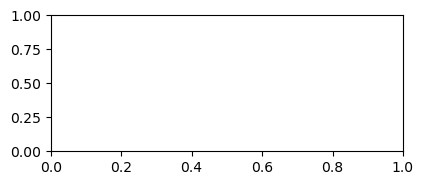

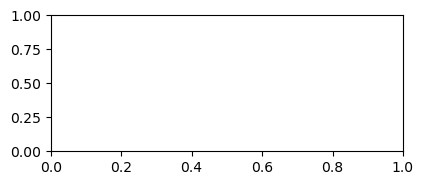

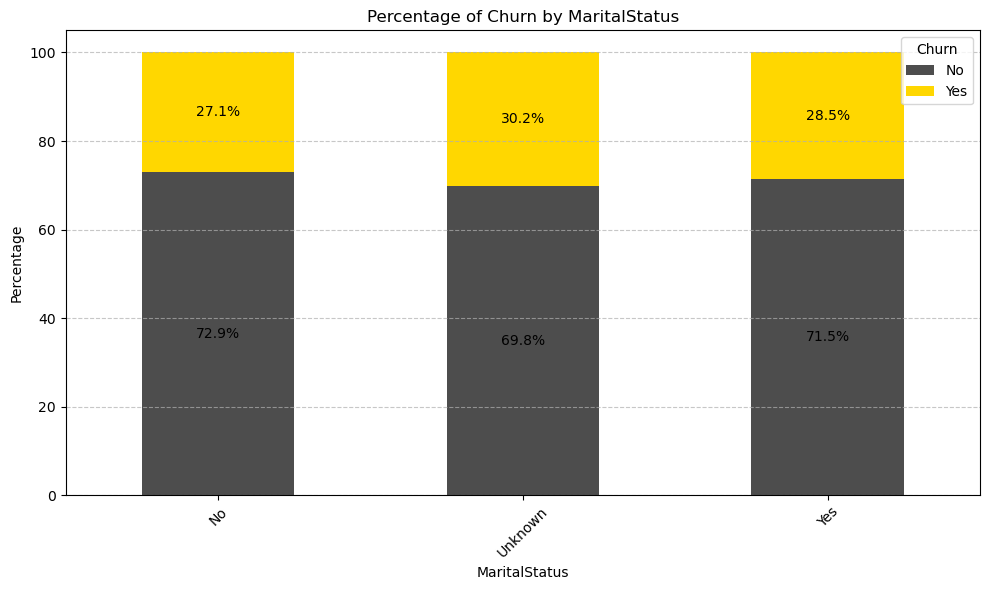

In [12]:
# Plotting churn percentage for each categorical column
plt.figure(figsize=(18, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    plot_churn_percentage(data, column)

plt.tight_layout()
plt.show()

In [13]:
# Ensure data types are correct, especially for the 'Churn' column
print("Data types:", data.dtypes)  # This will print the data types of each column
print("Unique values in 'Churn':", data['Churn'].unique())  # Check the unique values in the 'Churn' column

Data types: CustomerID                   float64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService              float64
UniqueSubs                   float64
ActiveSubs                   float64
ServiceArea               

In [14]:
# Function to plot churn percentage for categorical features
def plot_churn_percentage(data, column):
    if column not in data.columns:
        print(f"{column} is not in the dataframe.")
        return
    churn_counts = data.groupby([column, 'Churn']).size().unstack(fill_value=0)
    churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
    ax = churn_percentage.plot(kind='bar', stacked=True, color=['#4D4D4D', '#FFD700'], figsize=(10, 6))
    plt.title(f'Percentage of Churn by {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate percentage values on each bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                f'{height:.1f}%', 
                horizontalalignment='center', 
                verticalalignment='center')

In [19]:
# List of categorical columns to plot
categorical_columns = ['CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']


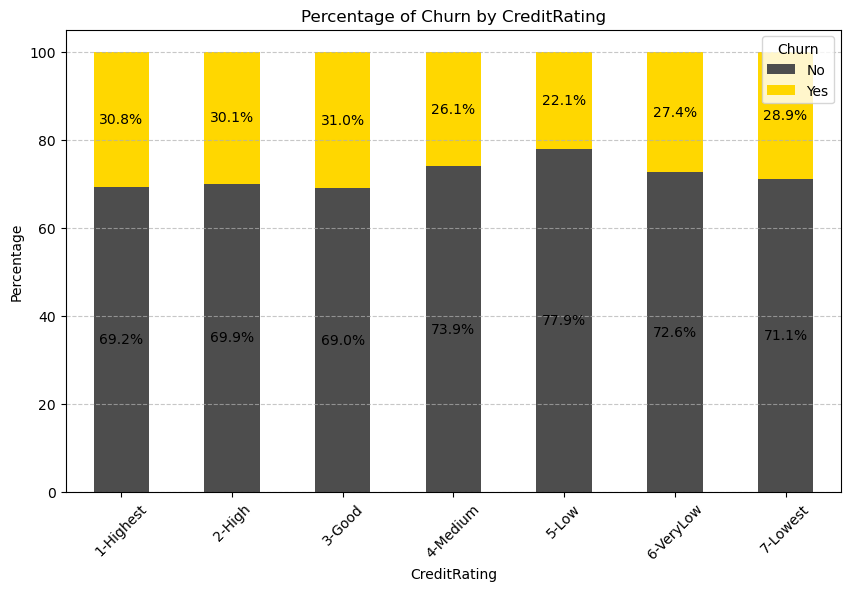

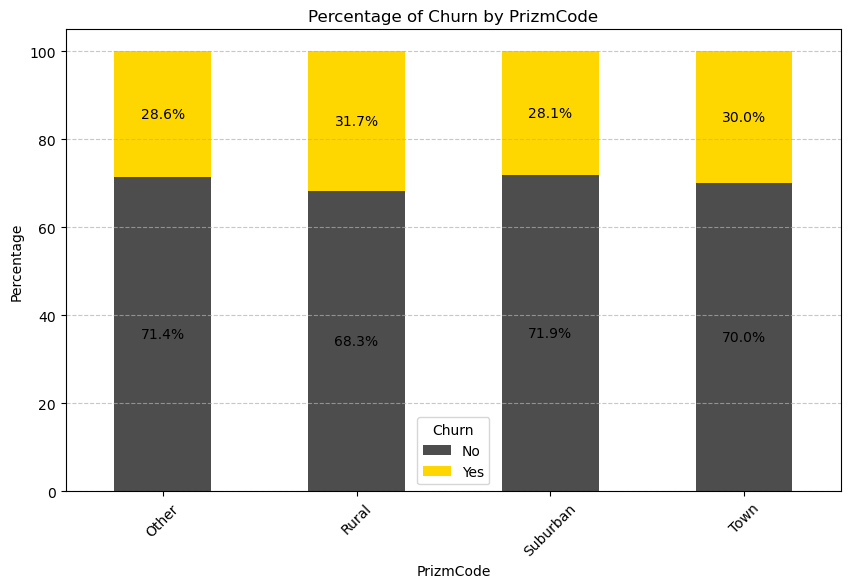

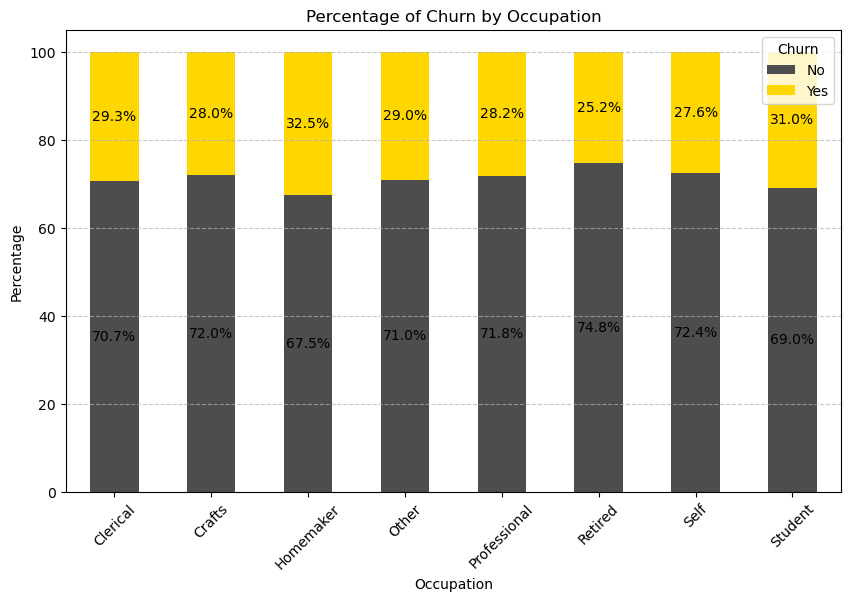

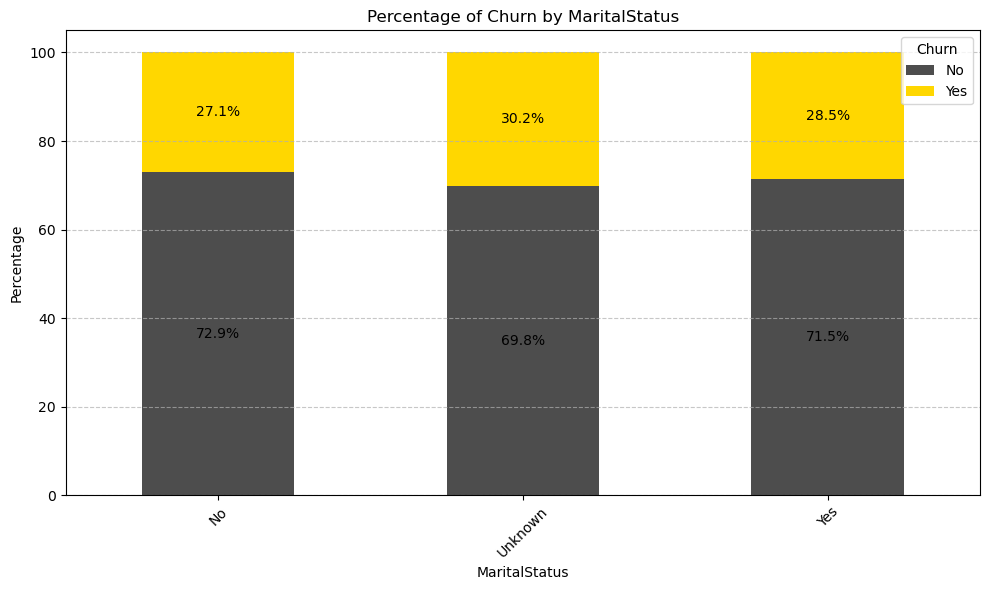

In [20]:
# Check for each column before plotting
for column in categorical_columns:
    if column in data.columns:
        plot_churn_percentage(data, column)
    else:
        print(f"{column} column not found in the dataset.")

plt.tight_layout()
plt.show()

In [21]:
# Simple bar chart to see the count of values in a category
def bar_chart(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


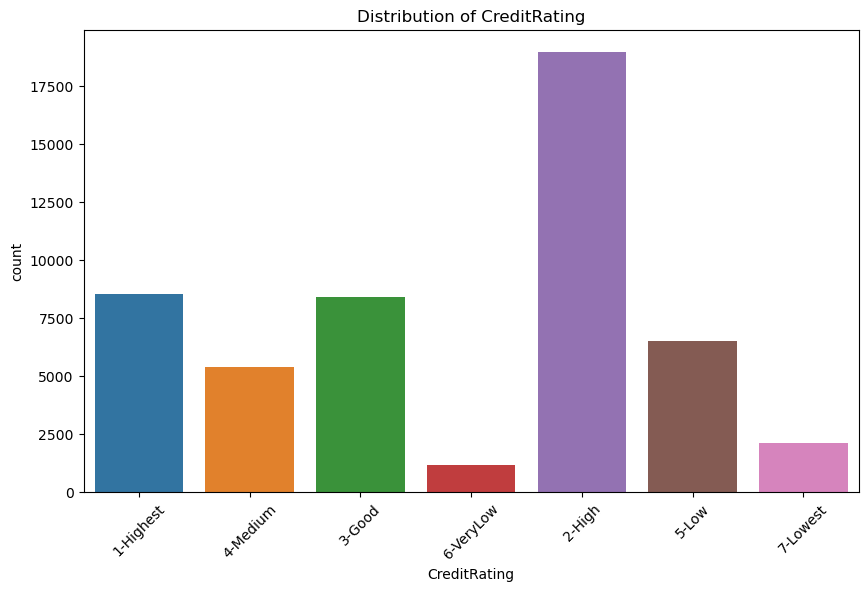

In [30]:
bar_chart(data, 'CreditRating')
#'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

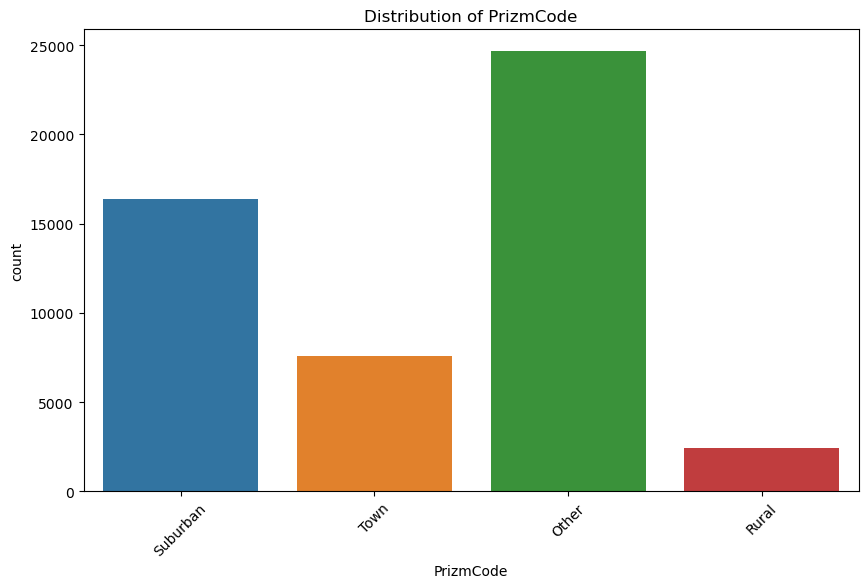

In [31]:
bar_chart(data, 'PrizmCode')
#'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

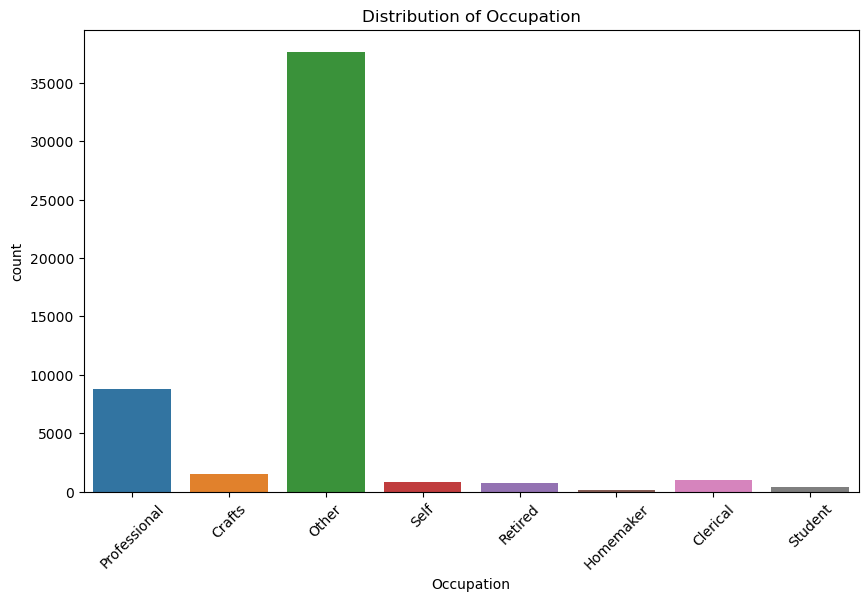

In [32]:
bar_chart(data, 'Occupation')
#'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

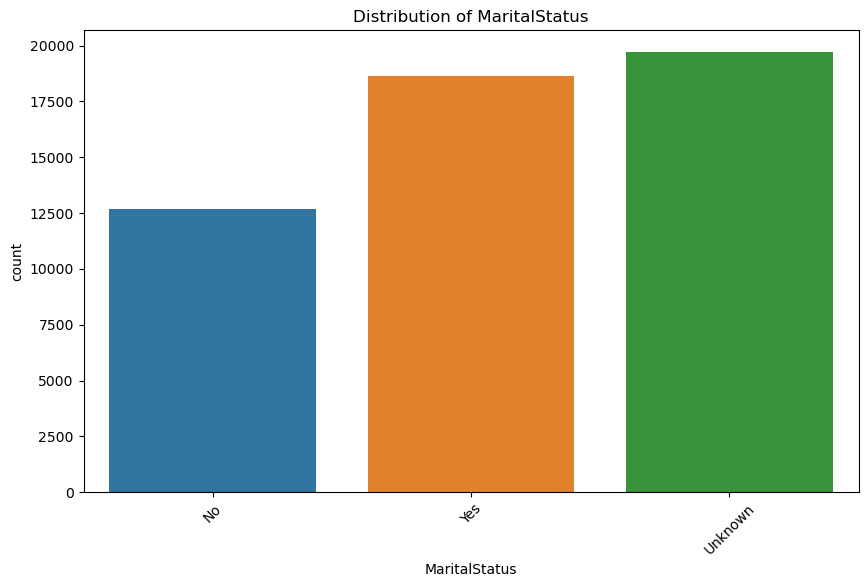

In [33]:
bar_chart(data, 'MaritalStatus')
#'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

In [24]:
def pie_chart(data, column):
    plt.figure(figsize=(8, 8))
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')  # Hide the y-label as it's not informative here
    plt.show()

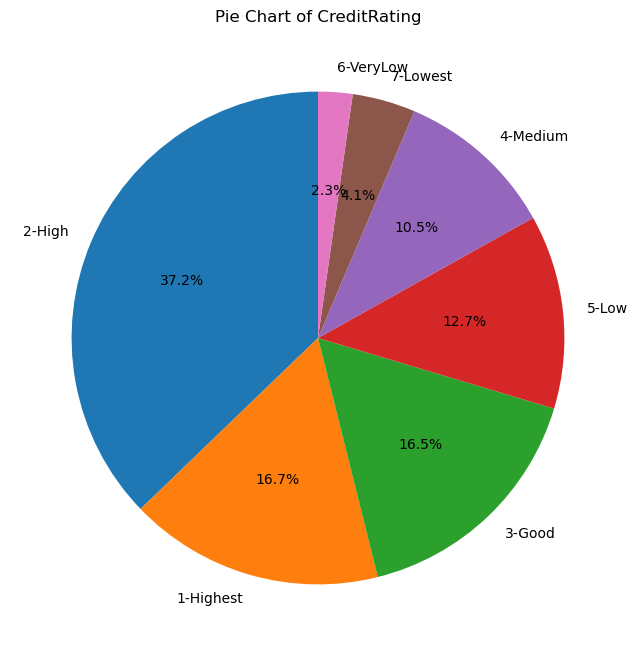

In [25]:
pie_chart(data, 'CreditRating')

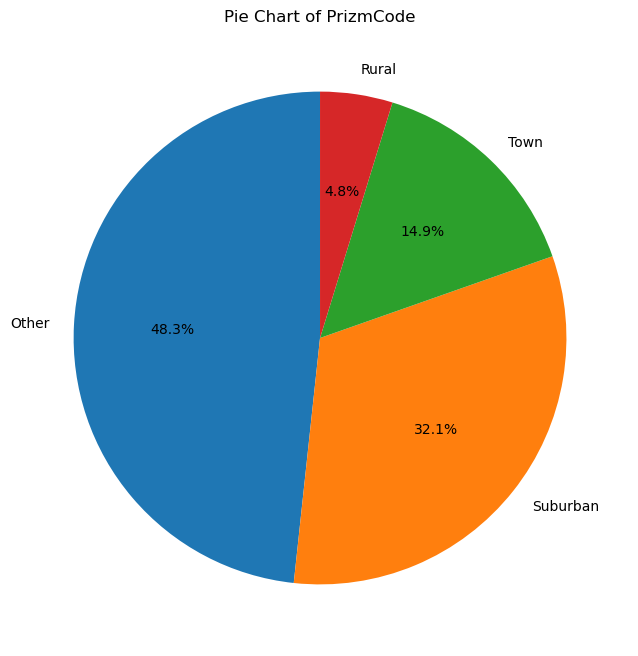

In [26]:
pie_chart(data, 'PrizmCode')
#'PrizmCode', 'Occupation', 'MaritalStatus'

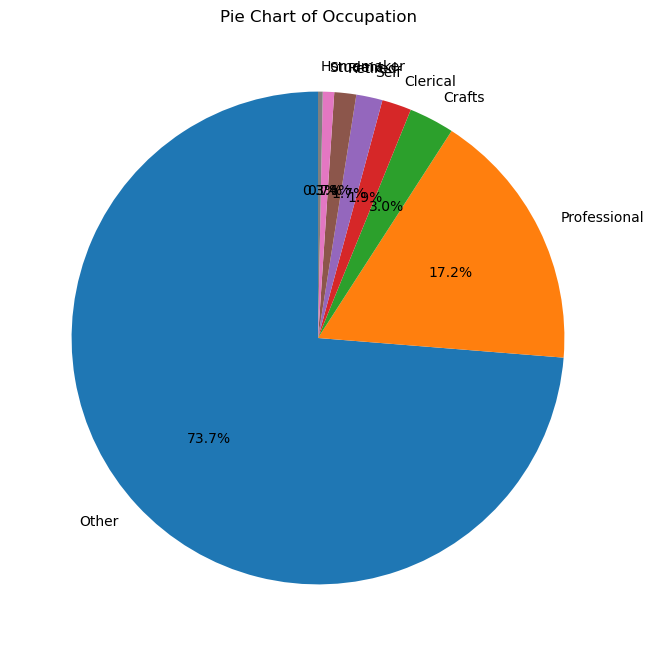

In [27]:
pie_chart(data, 'Occupation')
#'PrizmCode', 'Occupation', 'MaritalStatus'

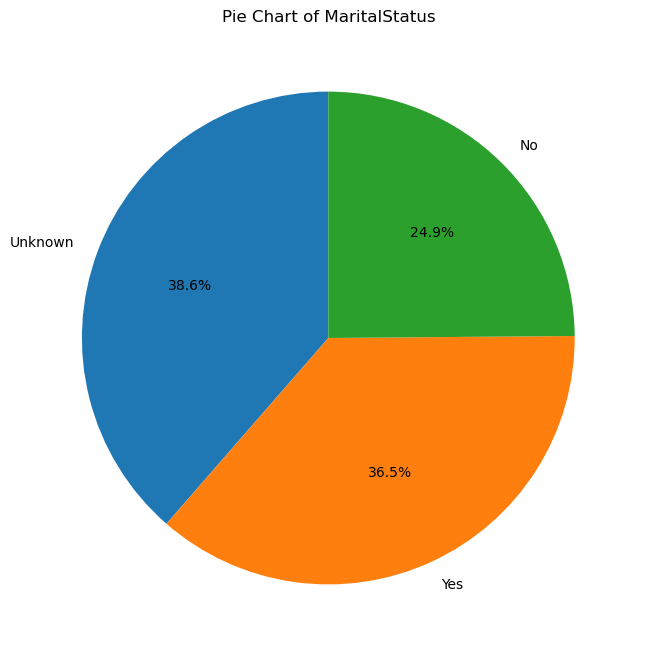

In [28]:
pie_chart(data, 'MaritalStatus')
#'PrizmCode', 'Occupation', 'MaritalStatus'

In [34]:
# Modified bar chart to see the count of values in a category, split by 'Churn' status
def bar_chart_churn_ratio(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Churn', data=data, palette='viridis')
    plt.title(f'Distribution of {column} by Churn')
    plt.xticks(rotation=45)
    plt.legend(title='Churn')
    plt.show()

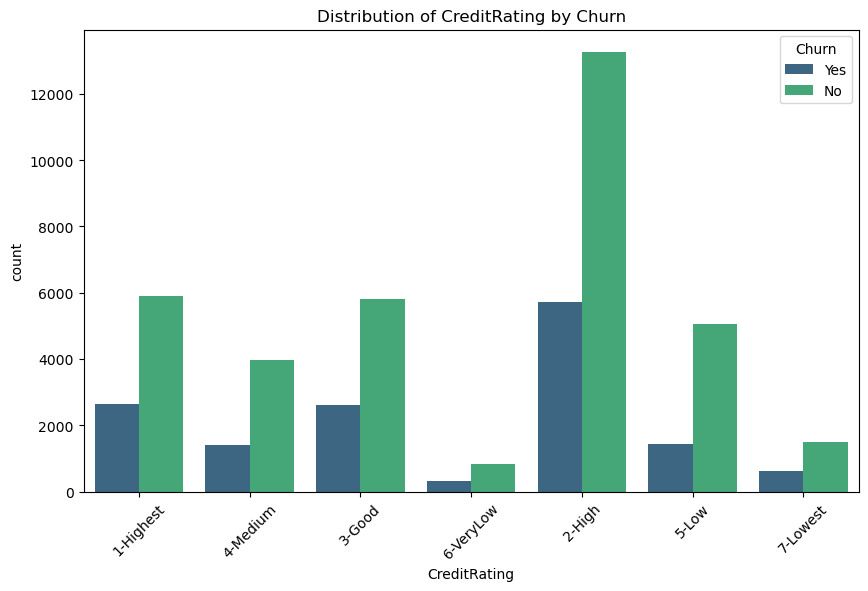

In [35]:
bar_chart_churn_ratio(data, 'CreditRating')
#'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

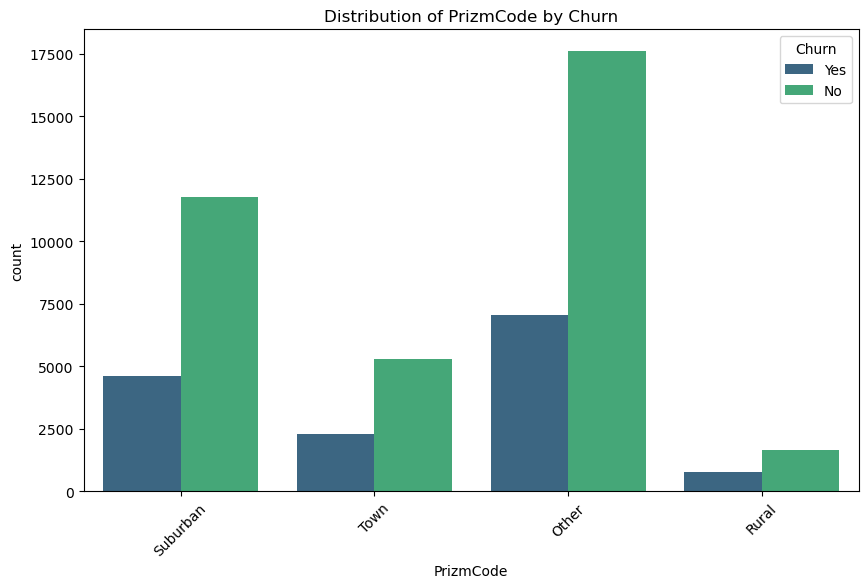

In [36]:
bar_chart_churn_ratio(data, 'PrizmCode')
#'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

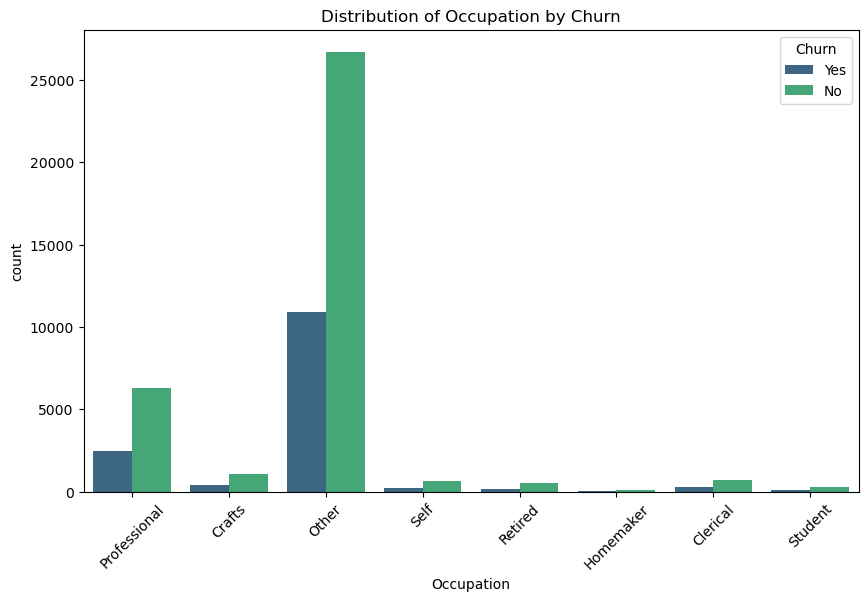

In [37]:
bar_chart_churn_ratio(data, 'Occupation')
#'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']

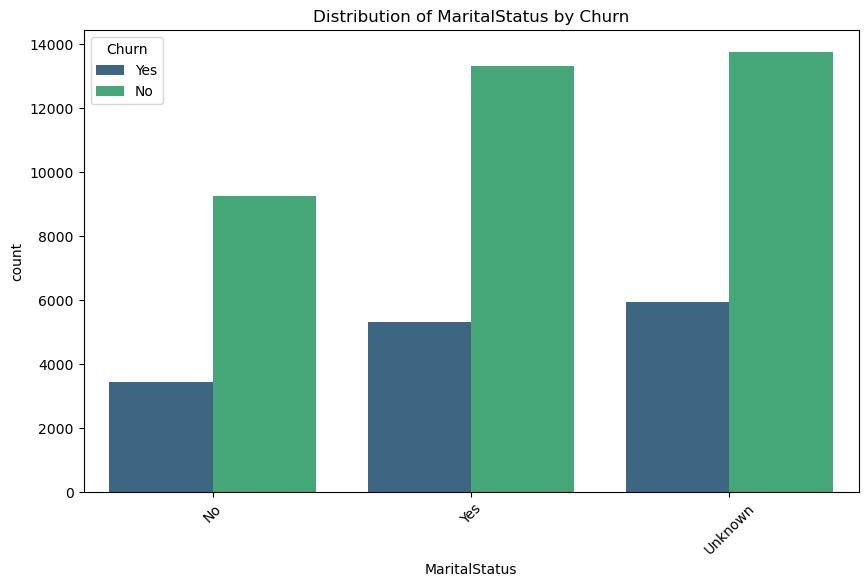

In [38]:
bar_chart_churn_ratio(data, 'MaritalStatus')
#'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']